In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

# Goals 

- Find churn drivers
- Construct a classification model that accurately predicts customer churn
- Deliver a report to explain the steps taken, the whys, and the whats (outcome)

# Steps

1. Plan
2. Acquire
3. Prep
4. Explore
5. Evaluate
6. Model
7. Deliver
8. Sleep

# 1. Plan

Completed on physical paper.

# 2. Acquire

In [2]:
pd.set_option('display.max_columns', None)
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

# 3. Prepare

### 3a. Clean

In [3]:
df = prepare.prep_telco(df)

In [5]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,1,0,0,0,1,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

Value counts of all object data points

In [7]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
df.partner.value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [9]:
df.dependents.value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [10]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [11]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [12]:
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [13]:
df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [14]:
df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [15]:
df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [16]:
df.streaming_tv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [17]:
df.streaming_movies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [18]:
df.paperless_billing.value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [19]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [4]:
df['partner'] = df['partner'].map({'Yes':1, 'No':0})
df['dependents'] = df['dependents'].map({'Yes':1, 'No':0})
df['phone_service'] = df['phone_service'].map({'Yes':1, 'No':0})
df['multiple_lines'] = df['multiple_lines'].map({'Yes':1, 'No':0, 'No phone service':0})
df['online_security'] = df['online_security'].map({'Yes':1, 'No':0, 'No internet service':0})
df['online_backup'] = df['online_backup'].map({'Yes':1, 'No':0, 'No internet service':0})
df['device_protection'] = df['device_protection'].map({'Yes':1, 'No':0, 'No internet service':0})
df['tech_support'] = df['tech_support'].map({'Yes':1, 'No':0, 'No internet service':0})
df['streaming_tv'] = df['streaming_tv'].map({'Yes':1, 'No':0, 'No internet service':0})
df['streaming_movies'] = df['streaming_movies'].map({'Yes':1, 'No':0, 'No internet service':0})
df['paperless_billing'] = df['paperless_billing'].map({'Yes':1, 'No':0})
df['churn'] = df['churn'].map({'Yes':1, 'No':0})
# This changes those data points from Yes/No to booleans True/False
# Therefore allowing them to potentially be used in future models, or maybe it'll be a waste of time, who knows.

In [5]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [22]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,Month-to-month,DSL,Mailed check,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,Month-to-month,Fiber optic,Mailed check,1,0,0,0,1,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   int64  
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   int64  
 4   dependents                              7043 non-null   int64  
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   int64  
 7   multiple_lines                          7043 non-null   int64  
 8   online_security                         7043 non-null   int64  
 9   online_backup                           7043 non-null   int64  
 10  device_protection                       7043 non-null   int6

In [6]:
# Dropping the columns I don't need: customer_id, contract_type, internet_service_type, payment_type

df = df.drop(columns = ['customer_id']) 
                       # 'contract_type', 'internet_service_type', 'payment_type'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  7043 non-null   int64  
 1   senior_citizen                          7043 non-null   int64  
 2   partner                                 7043 non-null   int64  
 3   dependents                              7043 non-null   int64  
 4   tenure                                  7043 non-null   int64  
 5   phone_service                           7043 non-null   int64  
 6   multiple_lines                          7043 non-null   int64  
 7   online_security                         7043 non-null   int64  
 8   online_backup                           7043 non-null   int64  
 9   device_protection                       7043 non-null   int64  
 10  tech_support                            7043 non-null   int6

In [26]:
df.shape

(7043, 30)

In [5]:
df[df.total_charges == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,4,1,3,1371-DWPAZ,0,0,1,1,0,0,0,1,1,1,1,1,0,0,56.05,,0,Two year,DSL,Credit card (automatic)
1731,2,3,3,2520-SGTTA,0,0,1,1,0,1,0,0,0,0,0,0,0,0,20.00,,0,Two year,None,Mailed check
1906,3,1,3,2775-SEFEE,1,0,0,1,0,1,1,1,1,0,1,0,0,1,61.90,,0,Two year,DSL,Bank transfer (automatic)
2025,2,3,2,2923-ARZLG,1,0,1,1,0,1,0,0,0,0,0,0,0,1,19.70,,0,One year,None,Mailed check
2176,2,3,3,3115-CZMZD,1,0,0,1,0,1,0,0,0,0,0,0,0,0,20.25,,0,Two year,None,Mailed check
2250,2,3,3,3213-VVOLG,1,0,1,1,0,1,1,0,0,0,0,0,0,0,25.35,,0,Two year,None,Mailed check
2855,2,1,3,4075-WKNIU,0,0,1,1,0,1,1,0,1,1,1,1,0,0,73.35,,0,Two year,DSL,Mailed check
3052,2,3,3,4367-NUYAO,1,0,1,1,0,1,1,0,0,0,0,0,0,0,25.75,,0,Two year,None,Mailed check
3118,3,1,3,4472-LVYGI,0,0,1,1,0,0,0,1,0,1,1,1,0,1,52.55,,0,Two year,DSL,Bank transfer (automatic)
4054,2,1,3,5709-LVOEQ,0,0,1,1,0,1,0,1,1,1,0,1,1,0,80.85,,0,Two year,DSL,Mailed check


In [7]:
# Dropping the 11 cases where the data reflects a blank total_charge/ tenure = 0
df = df.drop([945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433])

In [9]:
df.shape

(7032, 30)

In [8]:
# Changing total_charges from object to float

df['total_charges'] = pd.to_numeric(df['total_charges'])

In [31]:
df.total_charges.head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: total_charges, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  7032 non-null   int64  
 1   senior_citizen                          7032 non-null   int64  
 2   partner                                 7032 non-null   int64  
 3   dependents                              7032 non-null   int64  
 4   tenure                                  7032 non-null   int64  
 5   phone_service                           7032 non-null   int64  
 6   multiple_lines                          7032 non-null   int64  
 7   online_security                         7032 non-null   int64  
 8   online_backup                           7032 non-null   int64  
 9   device_protection                       7032 non-null   int64  
 10  tech_support                            7032 non-null   int6

### 3b. Split

In [9]:
train, validate, test = prepare.train_validate_test_split(df, 'churn', seed=123)

In [9]:
train.churn.mean()

0.2656845313690627

In [10]:
validate.churn.mean()

0.2659952606635071

In [14]:
test.churn.mean()

0.2658137882018479

In [37]:
train.shape

(3937, 30)

In [38]:
validate.shape

(1688, 30)

In [39]:
test.shape

(1407, 30)

# 4. Explore

In [40]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,0,0,0,58,1,1,1,1,1,1,0,0,1,71.10,4299.20,0,One year,DSL,Credit card (automatic),0,1,0,1,0,0,0,1,0,0
1915,1,0,0,1,71,1,1,1,1,0,0,0,0,1,85.45,6028.95,0,One year,Fiber optic,Credit card (automatic),0,1,0,0,1,0,0,1,0,0
5054,0,0,1,1,35,1,1,0,0,0,0,0,0,1,25.75,882.55,0,Month-to-month,None,Electronic check,1,0,0,0,0,1,0,0,1,0
2355,1,0,1,1,1,1,0,0,0,0,0,0,0,0,19.20,19.20,0,Month-to-month,None,Mailed check,1,0,0,0,0,1,0,0,0,1
6279,1,1,0,0,20,1,0,1,0,0,1,0,0,0,54.00,1055.90,0,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  3937 non-null   int64  
 1   senior_citizen                          3937 non-null   int64  
 2   partner                                 3937 non-null   int64  
 3   dependents                              3937 non-null   int64  
 4   tenure                                  3937 non-null   int64  
 5   phone_service                           3937 non-null   int64  
 6   multiple_lines                          3937 non-null   int64  
 7   online_security                         3937 non-null   int64  
 8   online_backup                           3937 non-null   int64  
 9   device_protection                       3937 non-null   int64  
 10  tech_support                            3937 non-null   i

In [42]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3937.0,0.501905,0.500060,0.00,0.0,1.00,1.0,1.00
senior_citizen,3937.0,0.161290,0.367845,0.00,0.0,0.00,0.0,1.00
partner,3937.0,0.485141,0.499843,0.00,0.0,0.00,1.0,1.00
dependents,3937.0,0.302769,0.459514,0.00,0.0,0.00,1.0,1.00
tenure,3937.0,32.775210,24.709604,1.00,9.0,30.00,56.0,72.00
phone_service,3937.0,0.905258,0.292896,0.00,1.0,1.00,1.0,1.00
multiple_lines,3937.0,0.423927,0.494242,0.00,0.0,0.00,1.0,1.00
online_security,3937.0,0.292609,0.455018,0.00,0.0,0.00,1.0,1.00
online_backup,3937.0,0.348743,0.476633,0.00,0.0,0.00,1.0,1.00
device_protection,3937.0,0.349759,0.476954,0.00,0.0,0.00,1.0,1.00


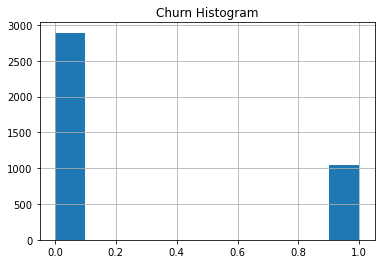

In [43]:
plt.title("Churn Histogram")
train.churn.hist()
plt.show()

In [44]:
train.churn.mean()

0.2656845313690627

27% of customers churn

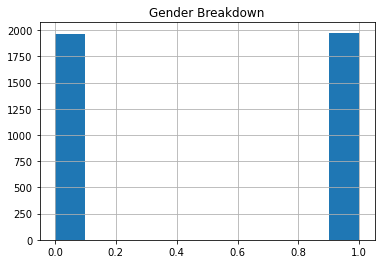

In [45]:
plt.title('Gender Breakdown')
train.gender.hist()
plt.show()

very even split between genders

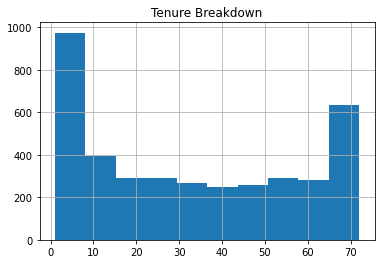

In [46]:
plt.title('Tenure Breakdown')
train.tenure.hist()
plt.show()

There appears to be a big drop in the first 10 months.

<AxesSubplot:>

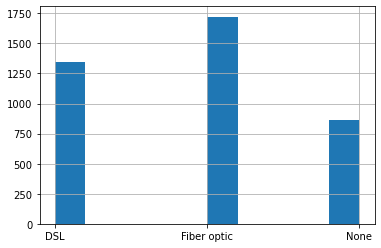

In [47]:
train.internet_service_type.hist()

More fiber customers than DSL

<AxesSubplot:>

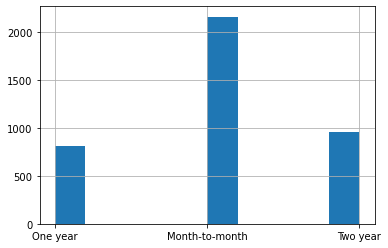

In [48]:
train.contract_type.hist()

More M2M than the others.

<AxesSubplot:>

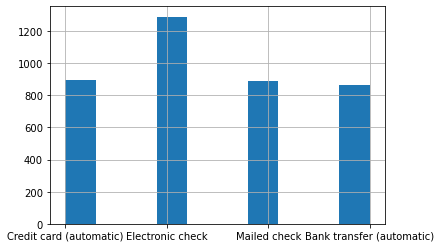

In [49]:
train.payment_type.hist()

All are very similar except for E-check with a bit more.

I'd like to explore how each of the three previous categories (internet, contract, and payment type) compare when it comes to their churn. 

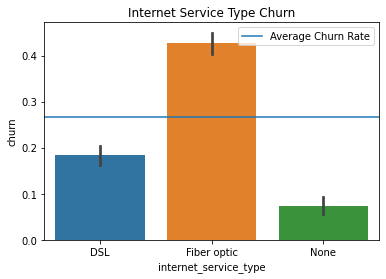

In [10]:
plt.title('Internet Service Type Churn')
sns.barplot(x='internet_service_type', y= 'churn', data=train)
rate = train.churn.mean()
plt.axhline(rate, label = 'Average Churn Rate')
plt.legend()
plt.show()

In [52]:
# Churn rate by internet sevice type
train.groupby('internet_service_type').churn.mean()

internet_service_type
DSL            0.183234
Fiber optic    0.426829
None           0.073818
Name: churn, dtype: float64

Fiber has a much higher churn rate

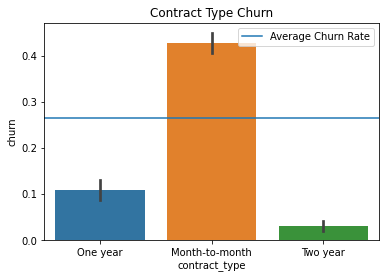

In [53]:
plt.title('Contract Type Churn')
sns.barplot(x='contract_type', y= 'churn', data=train)
rate = train.churn.mean()
plt.axhline(rate, label = 'Average Churn Rate')
plt.legend()
plt.show()

In [54]:
# Churn rate by contract type
train.groupby('contract_type').churn.mean()

contract_type
Month-to-month    0.428176
One year          0.109202
Two year          0.031348
Name: churn, dtype: float64

M2M has a much higher churn rate.

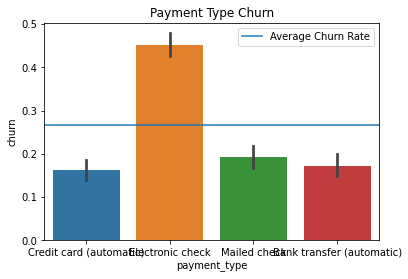

In [15]:
plt.title('Payment Type Churn')
sns.barplot(x='payment_type', y= 'churn', data=train)
rate = train.churn.mean()
plt.axhline(rate, label = 'Average Churn Rate')
plt.legend()
plt.show()

In [56]:
# Churn rate by Payment Typep
train.groupby('payment_type').churn.mean()

payment_type
Bank transfer (automatic)    0.172854
Credit card (automatic)      0.162011
Electronic check             0.450737
Mailed check                 0.191919
Name: churn, dtype: float64

E-check has a much higher churn rate

### I would like to run chi squared test on the above three categories to see if we can gain even more confidence in my findings. 

In [11]:
# Internet Service Type Chi^2 test.
alpha = 0.05
null_hypothesis = 'churn rate and internet service type are independent'
alternative_hypothesis = 'there is a relationship between churn rate and internet service type'

# Setup a crosstab of churn to internet service type
crosstab = pd.crosstab(train.churn, train.internet_service_type)

chi2, p, degf, expected = stats.chi2_contingency(crosstab)

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
    print('Sufficient evidence to move forward understanding that', alternative_hypothesis)
else:
    print('Fail to reject the null hypothesis')
    print('Insufficient evidence to reject the null')
p

Reject the null hypothesis that churn rate and internet service type are independent
Sufficient evidence to move forward understanding that there is a relationship between churn rate and internet service type


3.2062272759526154e-96

In [12]:
# Contract Type Chi^2 test.
alpha = 0.05
null_hypothesis = 'churn rate and contract type are independent'
alternative_hypothesis = 'there is a relationship between churn rate and contract type'

# Setup a crosstab of churn to contract type
crosstab = pd.crosstab(train.churn, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(crosstab)

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
    print('Sufficient evidence to move forward understanding that', alternative_hypothesis)
else:
    print('Fail to reject the null hypothesis')
    print('Insufficient evidence to reject the null')
p

Reject the null hypothesis that churn rate and contract type are independent
Sufficient evidence to move forward understanding that there is a relationship between churn rate and contract type


4.693667062132269e-145

In [13]:
# Payment Type Chi^2 test.
alpha = 0.05
null_hypothesis = 'churn rate and payment type are independent'
alternative_hypothesis = 'there is a relationship between churn rate and payment type'

# Setup a crosstab of churn to payment type
crosstab = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(crosstab)

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
    print('Sufficient evidence to move forward understanding that', alternative_hypothesis)
else:
    print('Fail to reject the null hypothesis')
    print('Insufficient evidence to reject the null')
p

Reject the null hypothesis that churn rate and payment type are independent
Sufficient evidence to move forward understanding that there is a relationship between churn rate and payment type


4.64358817076333e-73

### The Chi2 tests have shown that all three categories have a relationship with the rate of churn.

In [19]:
# Overall churn rate
train.churn.mean()

0.2656845313690627

The churn rates for Fiber (43%), M2M (43%), and E-Check (45%) are all significantly higher than the overall Churn Rate of 27%.

# 5. Evaluate

### Overall Baseline

In [63]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [64]:
train['overall_baseline_prediction'] = 0

- TP: Actually does not churn, predicts does not churn
- FN: Actually does not churn, predicts churn
- FP: Actually churns, predicts does not churn
- TN: Actually churns, predicts churn

### Fiber Baseline

In [65]:
train[train.internet_service_type == 'Fiber optic'].churn.value_counts()

0    987
1    735
Name: churn, dtype: int64

In [66]:
train['fiber_baseline_prediction'] = 0

- TP: Actually does not churn, predicts does not churn
- FN: Actually does not churn, predicts churn
- FP: Actually churns, predicts does not churn
- TN: Actually churns, predicts churn

### Contract Type Baseline

In [68]:
train[train.contract_type == 'Month-to-month'].churn.value_counts()

0    1238
1     927
Name: churn, dtype: int64

In [69]:
train['M2M_baseline_prediction'] = 0

- TP: Actually does not churn, predicts does not churn
- FN: Actually does not churn, predicts churn
- FP: Actually churns, predicts does not churn
- TN: Actually churns, predicts churn

### Payment Type Baseline

In [70]:
train[train.payment_type == 'Electronic check'].churn.value_counts()

0    708
1    581
Name: churn, dtype: int64

In [71]:
train['E-check_baseline_prediction'] = 0

- TP: Actually does not churn, predicts does not churn
- FN: Actually does not churn, predicts churn
- FP: Actually churns, predicts does not churn
- TN: Actually churns, predicts churn

I've established baseline predictions for the Overall Churn Rate as well as the churn rates for our top three churn drivers. I will compare future models' performance to the performance of these baseline predictions. 

# 6. Model

## 6a. Decision Tree

In [72]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,overall_baseline_prediction,fiber_baseline_prediction,M2M_baseline_prediction,E-check_baseline_prediction
5919,0,0,0,0,58,1,1,1,1,1,1,0,0,1,71.10,4299.20,0,One year,DSL,Credit card (automatic),0,1,0,1,0,0,0,1,0,0,0,0,0,0
1915,1,0,0,1,71,1,1,1,1,0,0,0,0,1,85.45,6028.95,0,One year,Fiber optic,Credit card (automatic),0,1,0,0,1,0,0,1,0,0,0,0,0,0
5054,0,0,1,1,35,1,1,0,0,0,0,0,0,1,25.75,882.55,0,Month-to-month,None,Electronic check,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2355,1,0,1,1,1,1,0,0,0,0,0,0,0,0,19.20,19.20,0,Month-to-month,None,Mailed check,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6279,1,1,0,0,20,1,0,1,0,0,1,0,0,0,54.00,1055.90,0,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In order to utilize the data with models I need to remove contract_type, internet_service_type, and payment_type

In [14]:
train_model = train.drop(columns = ['contract_type', 'internet_service_type', 'payment_type'])

In [15]:
validate_model = validate.drop(columns = ['contract_type', 'internet_service_type', 'payment_type'])

In [16]:
test_model = test.drop(columns = ['contract_type', 'internet_service_type', 'payment_type'])

In [23]:
train_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  3937 non-null   int64  
 1   senior_citizen                          3937 non-null   int64  
 2   partner                                 3937 non-null   int64  
 3   dependents                              3937 non-null   int64  
 4   tenure                                  3937 non-null   int64  
 5   phone_service                           3937 non-null   int64  
 6   multiple_lines                          3937 non-null   int64  
 7   online_security                         3937 non-null   int64  
 8   online_backup                           3937 non-null   int64  
 9   device_protection                       3937 non-null   int64  
 10  tech_support                            3937 non-null   i

In [17]:
# Establishing the x and y groups for my train, validate, and test data
x_train = train_model.drop(columns = ['churn'])
y_train = train_model.churn

x_validate = validate_model.drop(columns = ['churn'])
y_validate = validate_model.churn

x_test = test_model.drop(columns = ['churn'])
y_test = test_model.churn

In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  3937 non-null   int64  
 1   senior_citizen                          3937 non-null   int64  
 2   partner                                 3937 non-null   int64  
 3   dependents                              3937 non-null   int64  
 4   tenure                                  3937 non-null   int64  
 5   phone_service                           3937 non-null   int64  
 6   multiple_lines                          3937 non-null   int64  
 7   online_security                         3937 non-null   int64  
 8   online_backup                           3937 non-null   int64  
 9   device_protection                       3937 non-null   int64  
 10  tech_support                            3937 non-null   i

In [98]:
x_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 816 to 3718
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  1688 non-null   int64  
 1   senior_citizen                          1688 non-null   int64  
 2   partner                                 1688 non-null   int64  
 3   dependents                              1688 non-null   int64  
 4   tenure                                  1688 non-null   int64  
 5   phone_service                           1688 non-null   int64  
 6   multiple_lines                          1688 non-null   int64  
 7   online_security                         1688 non-null   int64  
 8   online_backup                           1688 non-null   int64  
 9   device_protection                       1688 non-null   int64  
 10  tech_support                            1688 non-null   in

In [78]:
y_train.head()

5919    0
1915    0
5054    0
2355    0
6279    0
Name: churn, dtype: int64

In [18]:
y_train = np.where(y_train == 0, 'No', 'Yes')

In [19]:
y_validate = np.where(y_validate == 0, 'No', 'Yes')

In [20]:
y_test = np.where(y_test == 0, 'No', 'Yes')

In [21]:
for i in range(1, 20):
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    tree = tree.fit(x_train, y_train)
    
    y_predictions = tree.predict(x_train)
    
    report = classification_report(y_train, y_predictions, output_dict = True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    No     Yes  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.859978     0.564322  0.772416     0.712150      0.781427
recall        0.824282     0.629063  0.772416     0.726673      0.772416
f1-score      0.841752     0.594937  0.772416     0.718344      0.776177
support    2891.000000  1046.000000  0.772416  3937.000000   3937.000000

Tree with max depth of 3
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.812836     0.713799   0.79807     0.763317      0.786523
recall        0.941889     0.400574   0.79807     0.671231      0.798070

[Text(0.3792796099099746, 0.975, 'contract_type_Month-to-month <= 0.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No'),
 Text(0.13158430302159652, 0.925, 'monthly_charges <= 93.775\ngini = 0.125\nsamples = 1772\nvalue = [1653, 119]\nclass = No'),
 Text(0.062024134463439164, 0.875, 'contract_type_One year <= 0.5\ngini = 0.072\nsamples = 1328\nvalue = [1278, 50]\nclass = No'),
 Text(0.030455394339893693, 0.825, 'senior_citizen <= 0.5\ngini = 0.032\nsamples = 741\nvalue = [729, 12]\nclass = No'),
 Text(0.021069769669108843, 0.775, 'payment_type_Electronic check <= 0.5\ngini = 0.023\nsamples = 697\nvalue = [689, 8]\nclass = No'),
 Text(0.016089642292774025, 0.725, 'tenure <= 65.5\ngini = 0.015\nsamples = 655\nvalue = [650, 5]\nclass = No'),
 Text(0.014557295407747929, 0.675, 'payment_type_Mailed check <= 0.5\ngini = 0.026\nsamples = 382\nvalue = [377, 5]\nclass = No'),
 Text(0.01302494852272183, 0.625, 'device_protection <= 0.5\ngini = 0.045\nsamples = 217\nvalue = [212, 5]

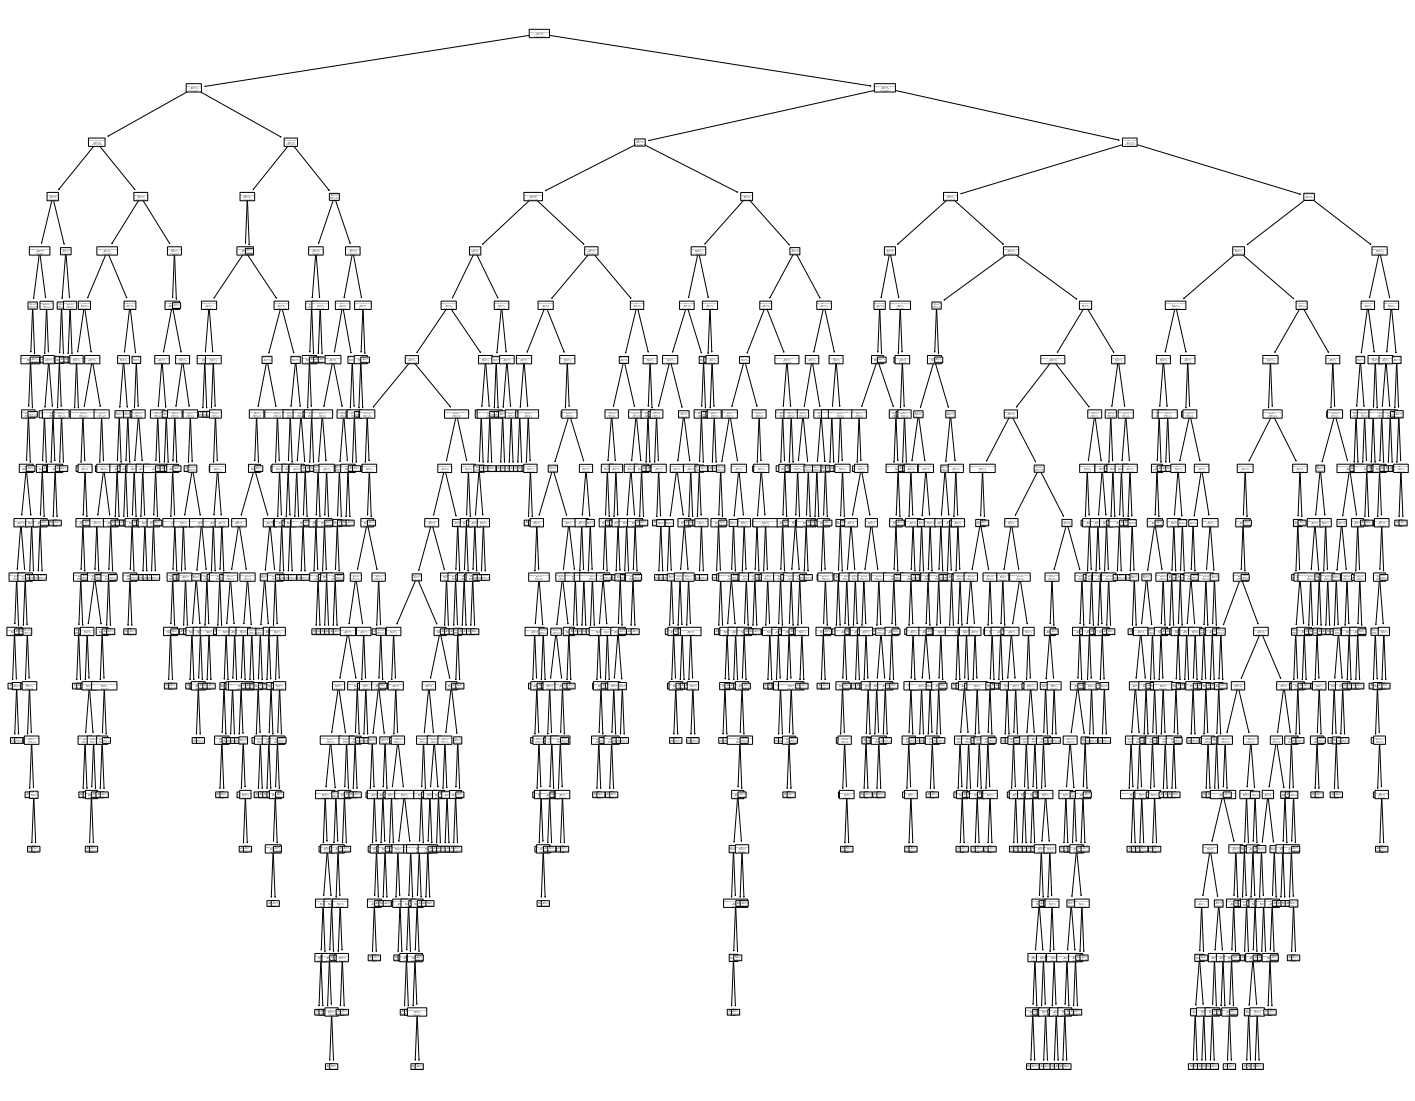

In [29]:
plt.figure(figsize=(25, 20))
plot_tree(tree, feature_names = x_train.columns, class_names = tree.classes_, rounded = True)

In [22]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.99


In [23]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      2891
         Yes       0.97      0.98      0.98      1046

    accuracy                           0.99      3937
   macro avg       0.98      0.98      0.98      3937
weighted avg       0.99      0.99      0.99      3937



Max depth of 15+ produces highest accuracy.

### Validate

In [24]:
metrics = []

for i in range(1, 20):
    
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    
    tree = tree.fit(x_train, y_train)
    
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)
    
    output = {
        'max_depth': i,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.772416,0.738744,0.033671
2,3,0.798070,0.773104,0.024965
3,4,0.800610,0.772512,0.028098
4,5,0.803658,0.771327,0.032331
5,6,0.812548,0.767180,0.045368
6,7,0.833884,0.760664,0.073220
7,8,0.850648,0.754739,0.095908
8,9,0.871222,0.751777,0.119444
9,10,0.892050,0.744076,0.147974


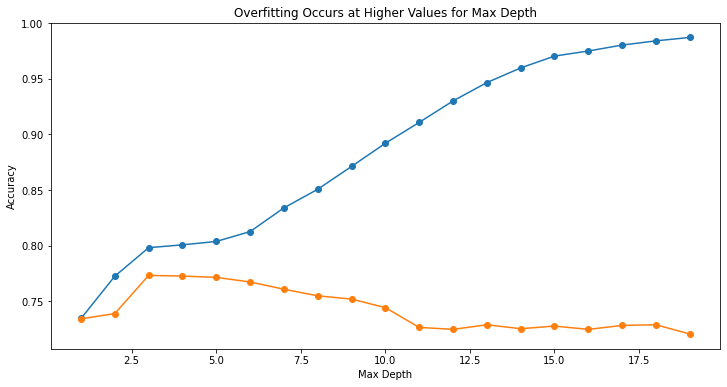

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [26]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.72


In [27]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.798070,0.773104,0.024965
3,4,0.800610,0.772512,0.028098
4,5,0.803658,0.771327,0.032331
5,6,0.812548,0.767180,0.045368
6,7,0.833884,0.760664,0.073220
7,8,0.850648,0.754739,0.095908
1,2,0.772416,0.738744,0.033671
0,1,0.734315,0.734005,0.000311


Best validate accuracy is 77% vs 80% train accuracy with a max_depth of 3.

### Test

In [28]:
metrics = []

tree = DecisionTreeClassifier(max_depth = 3, random_state = 123)
    
tree = tree.fit(x_train, y_train)
    
in_sample_accuracy = tree.score(x_train, y_train)
    
test_accuracy = tree.score(x_test, y_test)
    
output = {
        'max_depth': 3,
        'train_accuracy': in_sample_accuracy,
        'test_accuracy': test_accuracy
    }
    
metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.test_accuracy
df

,max_depth,train_accuracy,test_accuracy,difference
0,3,0.79807,0.788202,0.009868


Test accuracy is 79%

## 6b. Random Forest

### Train

In [29]:
rf = RandomForestClassifier(bootstrap = True,
                            class_weight = None,
                            criterion = 'gini',
                            min_samples_leaf = 3,
                            n_estimators = 100,
                            max_depth = 3,
                            random_state = 123)

In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [31]:
y_pred = rf.predict(x_train)

In [32]:
y_pred_proba = rf.predict_proba(x_train)

In [33]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [34]:
print(confusion_matrix(y_train, y_pred))

[[2778  113]
 [ 708  338]]


In [35]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.96      0.87      2891
         Yes       0.75      0.32      0.45      1046

    accuracy                           0.79      3937
   macro avg       0.77      0.64      0.66      3937
weighted avg       0.78      0.79      0.76      3937



### Validate

In [36]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
 .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.77


### Test

In [49]:
y_pred = rf.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [48]:
y_pred_proba = rf.predict_proba(x_test)

In [37]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 0.79


## 6c. KNN

### Train

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')

In [39]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_train)

In [53]:
y_pred_proba = knn.predict_proba(x_train)

In [55]:
pred_df = pd.DataFrame(y_pred)

In [57]:
pred_proba_df = pd.DataFrame(y_pred_proba)

In [61]:
predictions = pd.concat([pred_df, pred_proba_df], axis = 1)

In [62]:
predictions.to_csv('predictions.csv')

In [42]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [43]:
print(confusion_matrix(y_train, y_pred))

[[2667  224]
 [ 436  610]]


In [44]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89      2891
         Yes       0.73      0.58      0.65      1046

    accuracy                           0.83      3937
   macro avg       0.80      0.75      0.77      3937
weighted avg       0.83      0.83      0.83      3937



### Validate

In [45]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(x_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.76


### Test

In [46]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on test set: 0.77
